# Read Article Data

In [1]:
import sklearn
import numpy as np
import pickle

In [2]:
import pandas as pd

articles = pd.read_csv("articles.csv")
#print(df.shape)
#df.head()

In [3]:
filehandler = open("article_list.pkl", "rb")
article_list = pickle.load(filehandler)
filehandler.close()
len(article_list)

6206

In [4]:
df = articles.loc[articles.article_id.isin(article_list),:].reset_index().copy()
print(df.shape)
df.head()

(6206, 26)


,index,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
1,8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
2,9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."
3,27,123173001,123173,Control Top 50 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,50 denier tights with reinforcement at the top...
4,35,129085027,129085,Pirate Leggings (1),273,Leggings/Tights,Garment Lower body,1010010,Melange,7,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,3/4-length leggings in stretch jersey with an ...


# Find Categorical Columns to Represent The Data

In [5]:
ohe_columns = []
total = 0

for col in df.columns:
    if df[col].dtype == "int64" and len(df[col].unique()) <= 500:
        ohe_columns.append(col)
        total += len(df[col].unique())
    
    print(col, df[col].dtype, len(df[col].unique()))
    
    
print("Columns to use:", ohe_columns)

index int64 6206
article_id int64 6206
product_code int64 3662
prod_name object 3788
product_type_no int64 92
product_type_name object 91
product_group_name object 12
graphical_appearance_no int64 27
graphical_appearance_name object 27
colour_group_code int64 47
colour_group_name object 47
perceived_colour_value_id int64 7
perceived_colour_value_name object 7
perceived_colour_master_id int64 18
perceived_colour_master_name object 18
department_no int64 209
department_name object 170
index_code object 10
index_name object 10
index_group_no int64 5
index_group_name object 5
section_no int64 49
section_name object 49
garment_group_no int64 21
garment_group_name object 21
detail_desc object 3551
Columns to use: ['product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_group_no', 'section_no', 'garment_group_no']


# One-Hot-Encoding

In [6]:
V = pd.get_dummies(df[ohe_columns], columns=ohe_columns).values
V.shape

(6206, 475)

# TFIDF for Article Description

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Blake\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False
    
def remove_stopwords(data):
    output_array=[]
    for sentence in data:
        temp_list=[]
        for word in sentence.split():
            if word.lower() not in stopwords:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["detail_desc"] = df["detail_desc"].fillna("nodesc")

desc = df.detail_desc.str.lower()
desc_clean = remove_stopwords(desc)

In [10]:

tfidf = TfidfVectorizer(min_df=2, ngram_range = (2,2))
V_desc = tfidf.fit_transform(desc_clean)
V_desc.shape


(6206, 6647)

In [81]:
feature_array = np.array(tfidf.get_feature_names_out())
tfidf_sorting = np.argsort(V_desc.toarray()).flatten()[::-1]

top_n = feature_array[tfidf_sorting][:11]
top_n

array(['voluminous raglan', 'ties long', 'neckline shaped',
       'front narrow', 'dress jersey', 'wide cuffs', 'long voluminous',
       'line dress', 'narrow ties', 'cuffs covered', 'short line'],
      dtype=object)

In [83]:
top_n = np.delete(top_n, 1)
top_n

array(['voluminous raglan', 'neckline shaped', 'front narrow',
       'dress jersey', 'wide cuffs', 'long voluminous', 'line dress',
       'narrow ties', 'cuffs covered', 'short line'], dtype=object)

In [84]:
from wordcloud import WordCloud
import matplotlib as plt

In [69]:
top_words = []
for phrase in top_n:
    words = phrase.split(' ')
    new_phrase = '-'.join([words[0], words[1]])
    top_words.append(new_phrase)
top_words 

frequencies = list(range(len(top_words), 0, -1))

d = dict(zip(top_words, frequencies))
d

{'voluminous-raglan': 20,
 'ties-long': 19,
 'neckline-shaped': 18,
 'front-narrow': 17,
 'dress-jersey': 16,
 'wide-cuffs': 15,
 'long-voluminous': 14,
 'line-dress': 13,
 'narrow-ties': 12,
 'cuffs-covered': 11,
 'short-line': 10,
 'opening-front': 9,
 'shaped-opening': 8,
 'covered-buttons': 7,
 'jersey-round': 6,
 'sleeves-wide': 5,
 'raglan-sleeves': 4,
 'round-neckline': 3,
 'front-medium': 2,
 'front-mesh': 1}

In [85]:
wordcloud_2 = WordCloud(collocation_threshold = 2).generate(' '.join(top_n))
#wordcloud_2 = WordCloud().generate(' '.join(top_words))
#r[\w\s]+
#wordcloud = WordCloud(collocation_threshold=2).generate_from_frequencies(d)

(-0.5, 399.5, 199.5, -0.5)

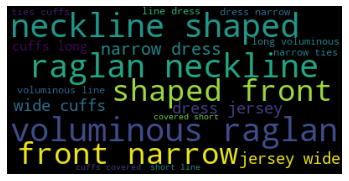

In [88]:
plt.pyplot.imshow(wordcloud_2)
plt.pyplot.axis("off")

In [23]:
feature_array

array(['10 cm', '100 denier', '11 cm', ..., 'zipped pocket',
       'zipped side', 'zipped sleeve'], dtype=object)

In [61]:
for i in  range(len(top_words),0, -1):
    print(i)

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


# Represent The Articles as Vectors of size 512

In [13]:
from sklearn.decomposition import TruncatedSVD


EMB_SIZE = 512

V = np.hstack([V.astype("float32"), V_desc.todense()])

svd = TruncatedSVD(n_components=EMB_SIZE, random_state=0)
svd.fit(V)
print("Explained variance ratio:", svd.explained_variance_ratio_.sum().item())

C:\Users\Blake\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Explained variance ratio: 0.9436170966185073


# Save The Article Embeddings

In [14]:
V = svd.transform(V)
print(V.shape)

np.save("articles.npy", V)

C:\Users\Blake\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(6206, 512)


In [20]:
V

array([[ 2.06751158e+00, -6.21076516e-01, -5.92496793e-01, ...,
         4.23956905e-03, -4.67446290e-02,  3.31114225e-02],
       [ 2.07627044e+00, -6.31662501e-01, -5.86878679e-01, ...,
         3.22738536e-03,  1.10119704e-02, -1.42932254e-02],
       [ 2.06799272e+00, -6.22478459e-01, -5.92206765e-01, ...,
         2.88334699e-02, -4.44693283e-02,  3.73425283e-02],
       ...,
       [ 8.21613402e-01,  7.25208981e-01, -1.42172458e-01, ...,
         3.64892626e-02, -4.38748978e-02,  4.18339185e-02],
       [ 2.16211994e+00, -5.89556905e-01, -5.01143952e-01, ...,
         1.36107444e-03,  6.53297512e-03, -1.52837714e-03],
       [ 2.20794402e+00, -5.69437561e-01, -4.72176352e-01, ...,
         1.86713113e-02, -7.51028024e-03, -1.81052384e-02]])

# Get similar article examples

In [15]:
from sklearn.neighbors import NearestNeighbors


matcher = NearestNeighbors(n_neighbors=2, metric="cosine")
matcher.fit(V)


distances, indices = matcher.kneighbors(V)

d, idx = distances[:, 1], indices[:, 1]  # exclude self-match, only get the best match

In [16]:
sorted_examples = np.argsort(d)

def get_example(i):
    index1 = sorted_examples[i]
    index2 = idx[index1]
    
    print("Match score:", np.round(1 - d[index1], 2))
    
    return df.iloc[[index1, index2]]

In [17]:
d

array([3.98865135e-03, 2.66729910e-04, 1.06403918e-05, ...,
       2.51054114e-01, 6.47264609e-02, 2.29060010e-02])

### A perfect match (probably a duplicate article)

In [18]:
get_example(0)

Match score: 1.0


,index,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1311,67740,751994016,751994,Slim 5pkt Midprice,272,Trousers,Garment Lower body,1010023,Denim,73,...,Denim trousers,F,Menswear,3,Menswear,56,Denim Men,1016,Trousers Denim,5-pocket jeans in washed denim with a regular ...
1311,67740,751994016,751994,Slim 5pkt Midprice,272,Trousers,Garment Lower body,1010023,Denim,73,...,Denim trousers,F,Menswear,3,Menswear,56,Denim Men,1016,Trousers Denim,5-pocket jeans in washed denim with a regular ...


### An average match

In [19]:
get_example(df.shape[0]//2)

Match score: 0.95


,index,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
4111,98600,880001002,880001,Nancy t-shirt,255,T-shirt,Garment Upper body,1010016,Solid,10,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,"V-neck T-shirt in soft, organic cotton jersey."
1638,74740,778064003,778064,Claudine t-shirt,255,T-shirt,Garment Upper body,1010016,Solid,10,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted top in soft organic cotton jersey with ...


In [44]:
desc = df.detail_desc.str.lower()
len(desc)

6206

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Blake\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False
    
def remove_stopwords(data):
    output_array=[]
    for sentence in data:
        temp_list=[]
        for word in sentence.split():
            if word.lower() not in stopwords:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

In [47]:
desc_clean = remove_stopwords(desc)

In [48]:
desc_clean 

['semi shiny nylon stockings wide, reinforced trim top. use suspender belt. 20 denier.',
 'tights built-in support lift bottom. black 30 denier light amber 15 denier.',
 'semi shiny tights shape tummy, thighs calves also encouraging blood circulation legs. elasticated waist.',
 '50 denier tights reinforcement top shaping effect tummy thighs.',
 '3/4-length leggings stretch jersey elasticated waist.',
 'umbrella telescopic handle matching cover. length 23 cm folded.',
 'long-sleeved sports top fast-drying, breathable functional fabric overlocked seams optimum comfort. polyester content top recycled.',
 'opaque matt leggings elasticated waist. 200 denier.',
 'semi shiny stay-ups wide lace trim top silicone inside. 20 denier.',
 'strapless bra microfibre underwired, padded cups lift shape bust. silicone trim top hook-and-eye fastening back. detachable, adjustable shoulder straps side support.',
 'strapless bra microfibre underwired, padded cups lift shape bust. silicone trim top hook-and-

In [49]:
df.detail_desc.isna().value_counts()

False    6206
Name: detail_desc, dtype: int64

In [51]:

tfidf = TfidfVectorizer(min_df=2)
V_desc = tfidf.fit_transform(desc_clean)
V_desc.shape

(6206, 1063)

In [52]:
feature_array = np.array(tfidf.get_feature_names_out())
tfidf_sorting = np.argsort(V_desc.toarray()).flatten()[::-1]

top_n = feature_array[tfidf_sorting][:10]

In [53]:
top_n

array(['voluminous', 'line', 'shaped', 'ties', 'raglan', 'opening',
       'covered', 'round', 'narrow', 'dress'], dtype=object)

In [58]:
tfidf = TfidfVectorizer(min_df=3, ngram_range = (1,2))
V_desc = tfidf.fit_transform(desc_clean)
V_desc.shape

(6206, 5751)

In [59]:
feature_array = np.array(tfidf.get_feature_names_out())
tfidf_sorting = np.argsort(V_desc.toarray()).flatten()[::-1]

top_n = feature_array[tfidf_sorting][:10]
top_n

array(['ties long', 'neckline shaped', 'front narrow', 'dress jersey',
       'wide cuffs', 'long voluminous', 'line dress', 'narrow ties',
       'cuffs covered', 'short line'], dtype=object)